## Salary-Prediction Model- ML Final Project

#### 1. Your views about the problem statement?

#### Ans- The problem states that as a data analyst at TechWorks Consulting which is a consulting company that specializes in providing top-notch IT talent to a variety of businesses wants to hire some professionals in its own company based on the given data.It involves predicting the salary of newly hired employees based on various features such as the college attended, city of residence, role, previous salary, experience, academic record etc. It's a regression problem where the goal is to create a machine learning model that accurately predicts the salary.

#### 2. What will be your approach to solving this task

#### Ans-My Approach will be- Data Exploraion and Preprocessing where understanding the dataset, checking for missing values, outliers,convert categorical data into numerical format, handling missing values,  I will change the college field and cities data into numerical data, and create dummy variable for Role. Then model selection where experimenting with different regression models such as Linear Regression, Decision Trees, Random Forest, Gradient Boosting etc and finally to evaluate models using appropriate metrics like Mean Squared Error (MSE) and R-squared to find the best Model.

#### 3. What were the available ML model options you had to perform this task?

#### Ans-  I have used multiple machine learning models for this regression task such as                                                                                       
#### 1) Linear Regression
#### 2) Ridge and Lasso Method
#### 3) Decision Tree Regression
#### 4) Bagging Regression with Grid Search
#### 5) Random Forest Regression with Grid Search
#### 6) Gradient Boosting Regression

#### 4 .Which model’s performance is best, and what could be the possible reason for that?

#### Ans- After Performing all the above models, performance can be assessed based on metrics like MSE and R-squared values and after evaluating I have found that BAGGING REGRESSION AND RANDOM FOREST REGRESSION both performed best out of all the other models , giving me the R2-Value of 0.6628354486031729 or 66.28% for both the models. And the possible reason can be because of  hyperparameter tuning which perform well due to their ability to capture complex relationships in the data and because of this achieves high predictive accuracy

#### 5. What steps can you take to improve this selected model’s performance even further?

#### Ans- Below steps can be taken to improve models performance-

#### 1) Additional hyperparameter huning to achieve more precise tuning, based on the model's performance on validation data.
#### 2) Experimenting with other Ensemble Methods  to increase prediction accuracy, 
#### 3) Use of strong cross-validation techniques to ensure the model's generalization performance.
#### 4) Gathering more diverse and representative data to train the model.

### Below is the Complete Breakdown of the dataset with all the Models Used to Train the data.`

## DATA EXPLORATION & PREPROCESSING

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Loading the ML_Case_Study CSV file

df1 = pd.read_csv("C:/Users/Saptarag Kashyap/ML case Study.csv", header=0)

In [5]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [7]:
df1.shape 

(1589, 8)

In [11]:
df2 = pd.read_csv("C:/Users/Saptarag Kashyap/Colleges.csv", header=0)

In [12]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [13]:
##Replacing colleges with approprite datatypes that is Tiers(1,2,3)

Tier1=df2["Tier 1"].tolist()
Tier2=df2["Tier 2"].tolist()
Tier3=df2["Tier 3"].tolist()

In [15]:
df2.dropna()


for item in df1.College:
    if item in Tier1:
        df1["College"].replace(item, 1 ,inplace=True)
    elif item in Tier2:
        df1["College"].replace(item, 2 ,inplace=True)
    elif item in Tier3:
        df1["College"].replace(item, 3 ,inplace=True)

In [16]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


##### As we can see Colleges are converted appripriately

In [18]:
df1.shape

(1589, 8)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 99.4+ KB


In [20]:
df3 = pd.read_csv("C:/Users/Saptarag Kashyap/cities.csv", header=0)

In [21]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [22]:
##Replacing Citites with approprite datatypes that is here Metro=1,Non-Metro=2

Metro_city=df3["Metrio City"].tolist()
Non_Metro_city=df3["non-metro cities"].tolist()

In [23]:
df3.dropna()

for item in df1.City:
    if item in Metro_city:
        df1["City"].replace(item, 1 ,inplace=True)
    elif item in Non_Metro_city:
        df1["City"].replace(item,2,inplace=True)

In [24]:
df3.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [25]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,2,Manager,55523.0,3,66,19,71406.58
1,2,2,Executive,57081.0,1,84,18,68005.87
2,3,2,Executive,60347.0,2,52,28,76764.02
3,3,2,Executive,49010.0,2,81,33,82092.39
4,1,2,Executive,57879.0,4,74,32,73878.10


#### As we can see Cities are converted appripriately

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


#### No Missing Values Found

In [27]:
df1.shape

(1589, 8)

In [28]:
df1.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,1.485840,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,2.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,2.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


#### No Outliers Found

In [29]:
df = pd.get_dummies(df1)

In [30]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,2,55523.0,3,66,19,71406.58,False,True
1,2,2,57081.0,1,84,18,68005.87,True,False
2,3,2,60347.0,2,52,28,76764.02,True,False
3,3,2,49010.0,2,81,33,82092.39,True,False
4,1,2,57879.0,4,74,32,73878.10,True,False


In [31]:
##Converting Role to Appropriate datatype

df["Role_Executive"]=df["Role_Executive"].astype(int)

In [32]:
df["Role_Manager"]=df["Role_Manager"].astype(int)

In [33]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,2,55523.0,3,66,19,71406.58,0,1
1,2,2,57081.0,1,84,18,68005.87,1,0
2,3,2,60347.0,2,52,28,76764.02,1,0
3,3,2,49010.0,2,81,33,82092.39,1,0
4,1,2,57879.0,4,74,32,73878.10,1,0


In [34]:
del df['Role_Executive']

In [46]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,2,55523.0,3,66,19,71406.58,1
1,2,2,57081.0,1,84,18,68005.87,0
2,3,2,60347.0,2,52,28,76764.02,0
3,3,2,49010.0,2,81,33,82092.39,0
4,1,2,57879.0,4,74,32,73878.10,0


In [47]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


<Axes: xlabel='College', ylabel='count'>

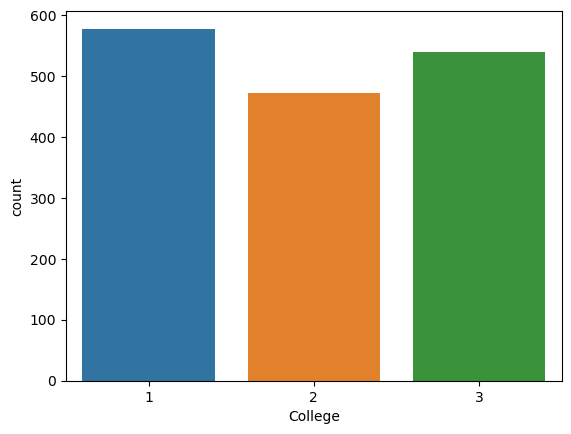

In [37]:
sns.countplot(x='College',data=df)

<Axes: xlabel='City', ylabel='count'>

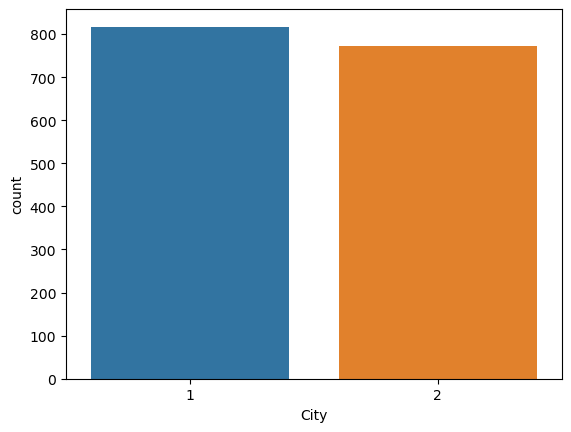

In [38]:
sns.countplot(x='City',data=df)

In [41]:
df.isnull().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

#### No Null Values Found

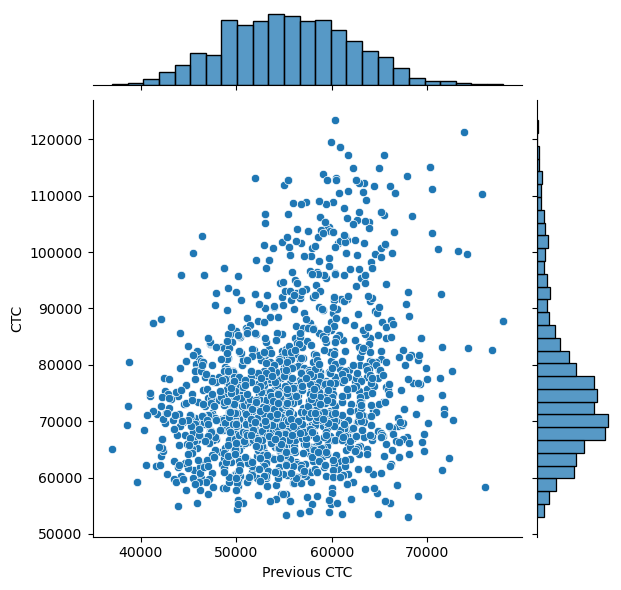

In [42]:
sns.jointplot(x=df['Previous CTC'],y=df['CTC'],data=df)

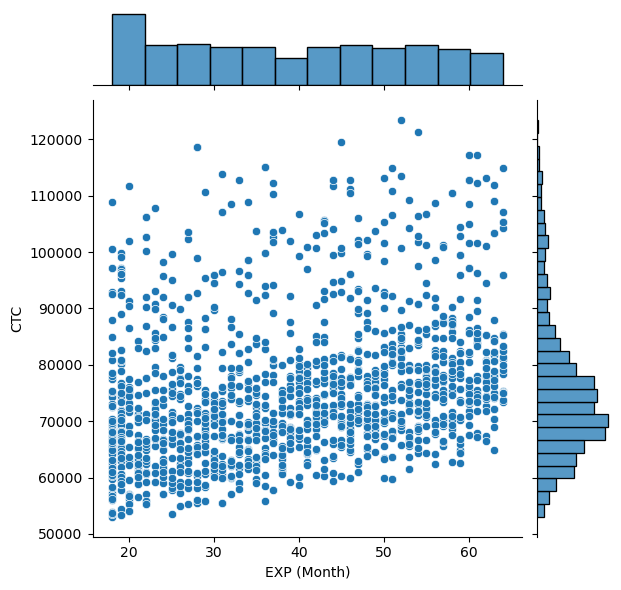

In [44]:
sns.jointplot(x=df['EXP (Month)'],y=df['CTC'],data=df)

## LInear Regression Model

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
X_multi = df.drop('CTC', axis = 1)

In [50]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,2,55523.0,3,66,19,1
1,2,2,57081.0,1,84,18,0
2,3,2,60347.0,2,52,28,0
3,3,2,49010.0,2,81,33,0
4,1,2,57879.0,4,74,32,0


In [51]:
X_multi.shape

(1589, 7)

In [53]:
y_multi=df["CTC"]

In [54]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [55]:
y_multi.shape

(1589,)

In [56]:
import statsmodels.api as sn

In [57]:
X_multi_cons = sn.add_constant(X_multi)

In [61]:
lm_multi = sn.OLS(y_multi,X_multi_cons).fit()

In [62]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          4.70e-257
Time:                        12:21:57   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.918e+04   2271.950     17.246      0.000    3.47e+04    4.36e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                 -380.8308    433.455     -0.879      0.380   -1231.039     469.377
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
## Now using the most Commonly used Linear Regression method other than OLS

lm3=LinearRegression()

In [70]:
lm3.fit(X_multi,y_multi)

LinearRegression()

In [71]:
print(lm3.intercept_, lm3.coef_)

39182.771380561986 [-4.81514705e+02 -3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02  1.94874279e+04]


## Test-Train Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X_multi,y_multi, test_size=0.2, random_state=0)

In [74]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [75]:
lm_a = LinearRegression()

In [76]:
lm_a.fit(X_train,y_train)

LinearRegression()

In [77]:
y_test_a = lm_a.predict(X_test)

In [78]:
y_train_a = lm_a.predict(X_train)

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(y_test,y_test_a)

0.5355989894790061

In [81]:
r2_score(y_train,y_train_a)

0.5331293335456955

#### we can see that r2 is almost same for test and train data

## Now Applying Ridge & Lasso Method

### Ridge Regression

In [84]:
from sklearn import preprocessing

In [85]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [86]:
X_train_s = scaler.transform(X_train)

In [87]:
X_test_s = scaler.transform(X_test)

In [88]:
from sklearn.linear_model import Ridge

In [89]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [90]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5355848845406525

#### We want to find the value of alpha for which r2 value is maximum, so we will now try another function that is
### Validation Curve


In [91]:
from sklearn.model_selection import validation_curve

In [92]:
param_range = np.logspace(-2,8,100)

In [93]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [94]:
train_scores, test_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name='alpha', param_range=param_range, scoring='r2')

In [95]:
print(train_scores)
print(test_scores)

[[5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395314e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993452e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456031e-01]
 [5.26336205e-01 5.33395313e-01 5.39739989e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395313e-01 5.39739988e-01 5.37993451e-01
  5.30456030e-01]
 [5.26336204e-01 5.33395312e-01 5.39739988e-01 5.37993450e-01
  5.30456030e-01]
 [5.26336203e-01 5.33395312e-01 5.39739987e-01 5.37993450e-01
  5.30456029e-01]
 [5.26336202e-01 5.33395311e-01 5.39739986e-01 5.37993448e-01
  5.30456028e-01]
 [5.26336200e-01 5.33395309e-01 5.39739984e-01 5.37993446e-01
  5.30456026e-01]
 [5.26336197e-01 5.33395306e-01 5.39739981e-01 5.37993443e-01
  5.30456022e-01]
 [5.26336192e-01 5.33395301e-01 5.397399

In [96]:
train_mean = np.mean(train_scores, axis=1)

In [97]:
test_mean=np.mean(test_scores,axis=1)

In [98]:
train_mean

array([5.33584198e-01, 5.33584198e-01, 5.33584198e-01, 5.33584198e-01,
       5.33584198e-01, 5.33584198e-01, 5.33584197e-01, 5.33584197e-01,
       5.33584196e-01, 5.33584195e-01, 5.33584193e-01, 5.33584190e-01,
       5.33584185e-01, 5.33584178e-01, 5.33584165e-01, 5.33584146e-01,
       5.33584115e-01, 5.33584066e-01, 5.33583988e-01, 5.33583864e-01,
       5.33583666e-01, 5.33583351e-01, 5.33582850e-01, 5.33582053e-01,
       5.33580786e-01, 5.33578772e-01, 5.33575572e-01, 5.33570492e-01,
       5.33562433e-01, 5.33549660e-01, 5.33529437e-01, 5.33497470e-01,
       5.33447031e-01, 5.33367635e-01, 5.33243023e-01, 5.33048161e-01,
       5.32744836e-01, 5.32275351e-01, 5.31553770e-01, 5.30454272e-01,
       5.28796554e-01, 5.26329100e-01, 5.22712731e-01, 5.17509194e-01,
       5.10182354e-01, 5.00121639e-01, 4.86696824e-01, 4.69347565e-01,
       4.47699366e-01, 4.21682378e-01, 3.91617638e-01, 3.58236040e-01,
       3.22612701e-01, 2.86027917e-01, 2.49791646e-01, 2.15078350e-01,
      

In [99]:
max(test_mean)

0.5258291929838951

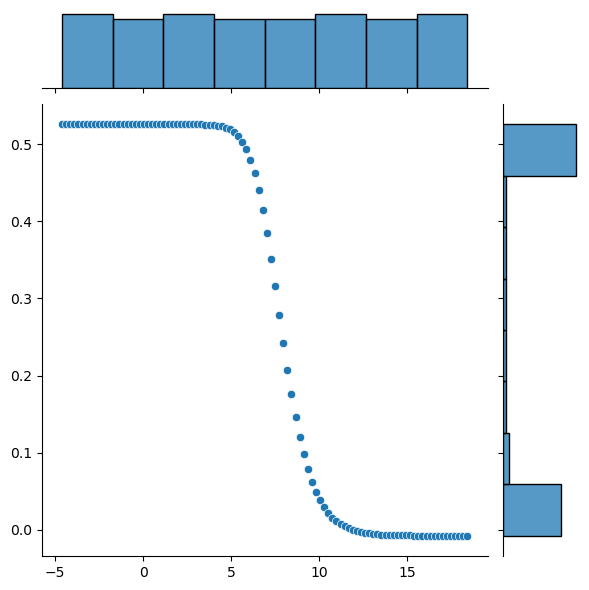

In [100]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [101]:
np.where(test_mean == max(test_mean))

(array([26], dtype=int64),)

In [102]:
param_range[26]

4.229242874389499

In [104]:
lm_r_best = Ridge(param_range[26])

In [105]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=4.229242874389499)

In [106]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.535475412672408

In [107]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.5331238227310131

## Lasso Method

In [109]:
from sklearn.linear_model import Lasso

In [164]:
lm_l = Ridge(alpha = 0.4)
lm_l.fit(X_train_s,y_train)

Ridge(alpha=0.4)

In [165]:
r2_score(y_test, lm_l.predict(X_test_s))

0.5355877164258337

In [166]:
from sklearn.model_selection import validation_curve

In [167]:
param_range = np.logspace(-2,8,100)

In [168]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [169]:
train_scores, test_scores = validation_curve(
    Ridge(), X_train_s, y_train, param_name='alpha', param_range=param_range, scoring='r2')

In [170]:
train_mean = np.mean(train_scores, axis = 1)

In [171]:
test_mean = np.mean(test_scores, axis = 1)

In [172]:
max(test_mean)

0.5258291929838951

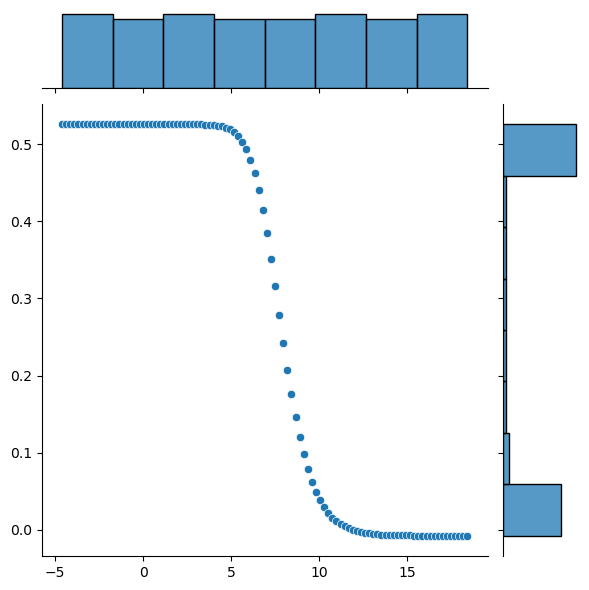

In [173]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [174]:
np.where(test_mean == max(test_mean))

(array([26], dtype=int64),)

In [175]:
param_range[26]

4.229242874389499

In [176]:
lm_l_best = Lasso(alpha = param_range[26])

In [177]:
lm_l_best.fit(X_train_s, y_train)

Lasso(alpha=4.229242874389499)

In [178]:
r2_score(y_test, lm_r_best.predict(X_test_s))

0.535475412672408

In [179]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.5331238227310131


## Decision Tree Regression

In [180]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,2,55523.0,3,66,19,71406.58,1
1,2,2,57081.0,1,84,18,68005.87,0
2,3,2,60347.0,2,52,28,76764.02,0
3,3,2,49010.0,2,81,33,82092.39,0
4,1,2,57879.0,4,74,32,73878.10,0


In [195]:
## X-y Split

X=df.drop(['CTC'],axis=1)

In [183]:
X.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,2,55523.0,3,66,19,1
1,2,2,57081.0,1,84,18,0
2,3,2,60347.0,2,52,28,0
3,3,2,49010.0,2,81,33,0
4,1,2,57879.0,4,74,32,0


In [185]:
type(X)

pandas.core.frame.DataFrame

In [186]:
X.shape

(1589, 7)

In [187]:
y=df["CTC"]

In [188]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [190]:
type(y)

pandas.core.series.Series

In [189]:
y.shape

(1589,)

In [196]:
##Test-train Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [197]:
X_train.shape

(1271, 7)

In [198]:
X_test.shape

(318, 7)

In [199]:
##Training Regression tree

from sklearn import tree

In [200]:
regtree=tree.DecisionTreeRegressor(max_depth=3)

In [201]:

regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [202]:
##Predict Values USing Trained Model

y_train_pred=regtree.predict(X_train)
y_test_pred=regtree.predict(X_test)

In [203]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

In [204]:
##Model Performance

from sklearn.metrics import mean_squared_error, r2_score

In [205]:
mean_squared_error(y_test,y_test_pred)

60424631.02613472

In [206]:
mean_squared_error(y_train,y_train_pred)

62125086.31211998

In [207]:
r2_score(y_train,y_train_pred)

0.6137194061789908

In [208]:
r2_score(y_test,y_test_pred)

0.5927831611924914

In [209]:
##Plotting Decision tree

dot_data = tree.export_graphviz(regtree, out_file= None)

In [210]:
from IPython.display import Image

In [211]:
import pydotplus

In [212]:
graph = pydotplus.graph_from_dot_data(dot_data)

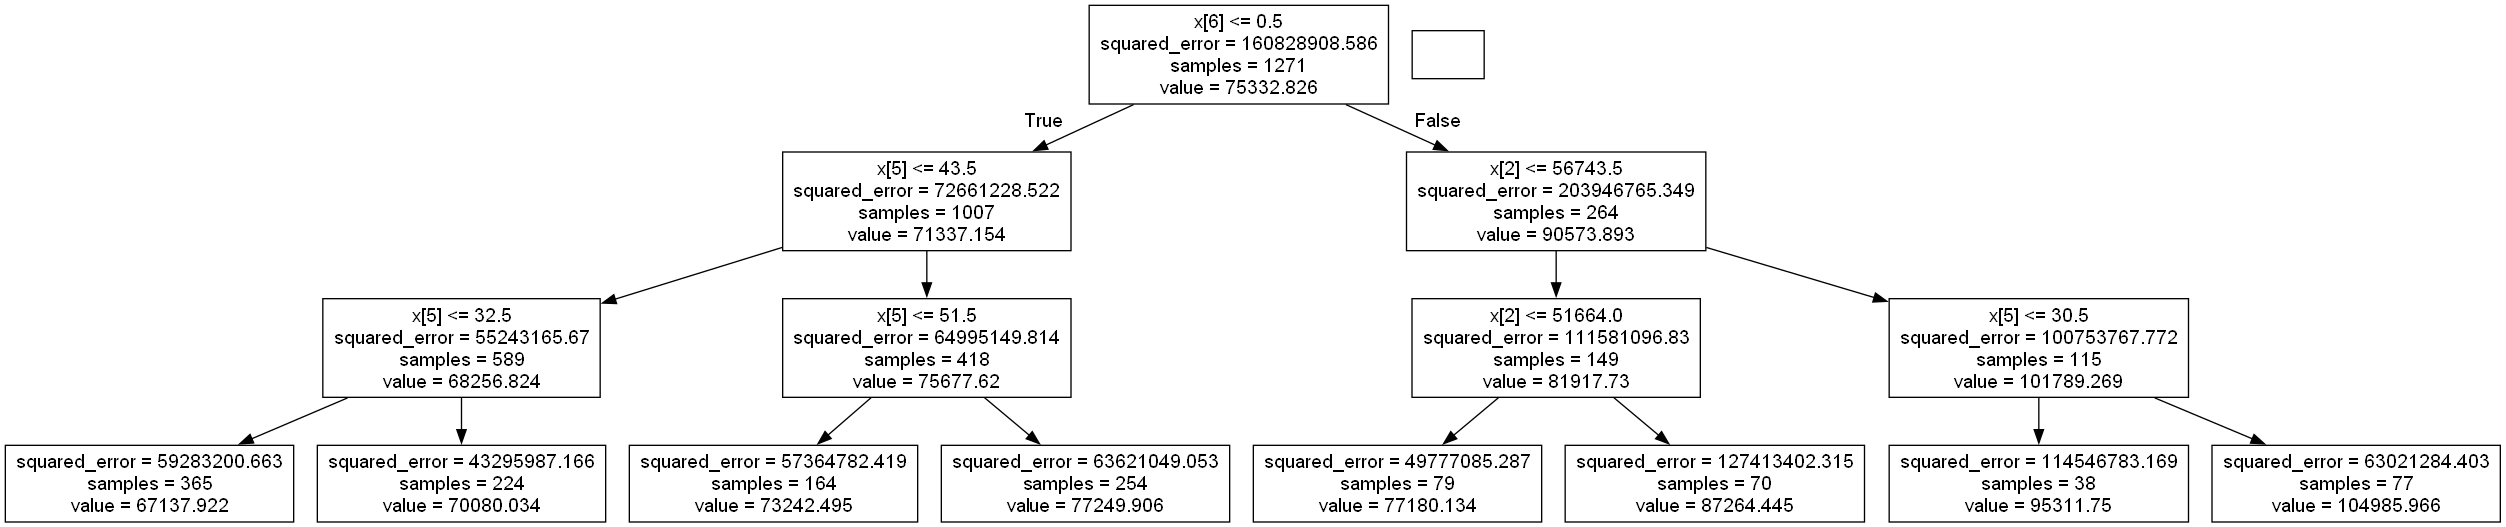

In [213]:
Image(graph.create_png())

## Bagging Regression

In [225]:
from sklearn.tree import DecisionTreeRegressor
clf_tree = DecisionTreeRegressor()

In [226]:
from sklearn.ensemble import BaggingRegressor

In [227]:
bag_reg=BaggingRegressor(base_estimator = clf_tree, n_estimators=1000, bootstrap=True, n_jobs=-1,random_state=42)

In [228]:
bag_reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1, random_state=42)

In [236]:
from sklearn.metrics import mean_squared_error, r2_score

In [237]:
y_pred = bag_reg.predict(X_test)

In [315]:
mean_squared_error(y_test,y_pred)

50347918.34096154

In [257]:
r2_score(y_test,y_pred)

0.6606926711976571

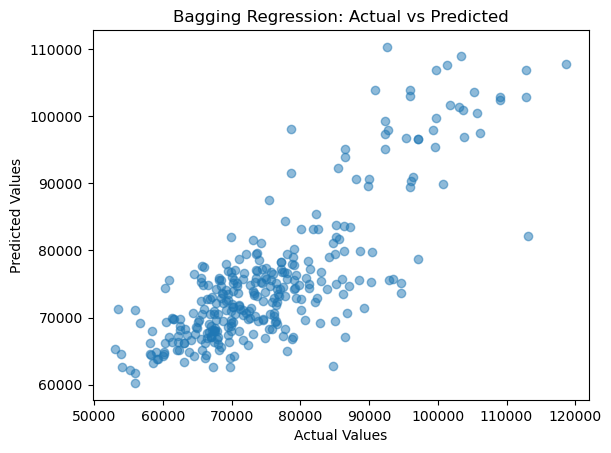

In [256]:
##Plotting a graph for comparison

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Bagging Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Grid Search for Bagging

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
bag_reg = RandomForestRegressor(n_estimators =250,random_state=42)

In [284]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 5, 10]}

In [285]:
grid_search = GridSearchCV(bag_reg, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [286]:
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [287]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [288]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=250, random_state=42)

In [299]:
y_pred_bag = grid_search.best_estimator_.predict(X_test)

In [300]:
mean_squared_error(y_test,y_pred_bag)

50029963.57642235

In [301]:
r2_score(y_test,y_pred_bag)

0.6628354486031729

## Random Forest Regression

In [248]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [249]:
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

In [250]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [251]:
y_pred_rf = rf_reg.predict(X_test)

In [252]:
mean_squared_error(y_test,y_pred_rf)

50426355.28312304

In [253]:
r2_score(y_test,y_pred_rf)

0.6601640648480558

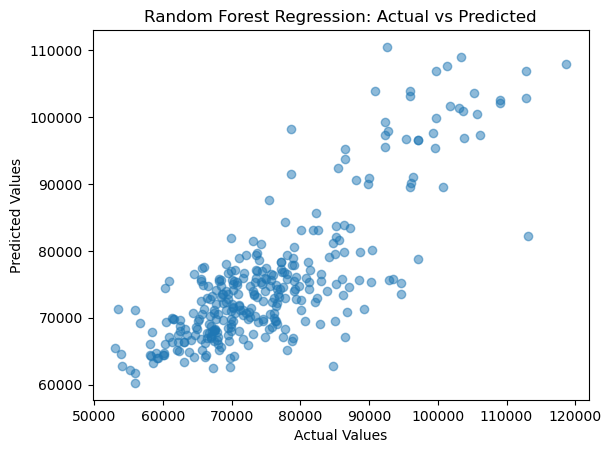

In [254]:
##Plotting a graph for comparison

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Grid Search for Random Forest

In [258]:
from sklearn.model_selection import GridSearchCV

In [260]:
rf_reg = RandomForestRegressor(n_estimators =250,random_state=42)

In [263]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 5, 10]}

In [264]:
grid_search = GridSearchCV(rf_reg, params_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [265]:
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [266]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

In [267]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=250, random_state=42)

In [290]:
y_pred_cv = cvrf_reg.predict(X_test)

In [291]:
mean_squared_error(y_test,y_pred_cv)

50029963.57642235

In [293]:
r2_score(y_test,y_pred_cv)

0.6628354486031729

## Gradient Boosting

In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [303]:
gbc_reg = GradientBoostingRegressor()

In [305]:
gbc_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [306]:
y_pred_gbc = gbc_reg.predict(X_test)

In [308]:
mean_squared_error(y_test,y_pred_gbc)

57569546.47833806

In [309]:
r2_score(y_test,y_pred_gbc)

0.6120242965430582

In [322]:
gbc_reg2 = GradientBoostingRegressor(learning_rate=0.02,n_estimators=1000,max_depth=5)


In [323]:
gbc_reg2.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=5, n_estimators=1000)

In [324]:
y_pred_gbc2 = gbc_reg2.predict(X_test)

In [325]:
mean_squared_error(y_test,y_pred_gbc2)

52357573.01610643

In [326]:
r2_score(y_test,y_pred_gbc2)

0.6471491011334349